In [21]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder
import os
print(os.getcwd())



c:\Users\Odeja\OneDrive\Desktop\Personalprojects\HousePricePrediction\notebook


In [10]:
# Load the dataset
data = pd.read_csv('..\\data\\data.csv')

In [ ]:
# Select only numeric columns to avoid errors when calculating quartiles
numeric_data = data.select_dtypes(include=['number'])

# Calculate the first quartile (Q1) and third quartile (Q3) for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define threshold to detect outliers (values outside 1.5 * IQR from Q1 and Q3)
threshold = 1.5 * IQR

# Identify rows with any feature value below (Q1 - threshold) or above (Q3 + threshold)
outliers = ((numeric_data.lt(Q1 - threshold)) | (numeric_data.gt(Q3 + threshold))).any(axis=1)

# Remove outlier rows from the dataset
data = data[~outliers]

# Drop the 'street' column, assuming it is categorical and not useful for model training
data = data.drop('street', axis=1)


In [14]:
# Map city names to numerical codes
city_map = {"Shoreline": 1, "Seattle": 2, "Kent": 3, "Bellevue": 4, "Redmond": 5, "Maple Valley": 6, "North Bend": 7, "Lake Forest Park": 8, 
            "Sammamish": 9, "Auburn": 10, "Des Moines": 11, "Bothell": 12, "Federal Way": 13, "Kirkland": 14, "Issaquah": 15, "Woodinville": 16, "Normandy Park": 18,
            "Fall City": 18, "Renton": 19, "Carnation": 20, "Snoqualmie": 21, "Duvall": 22, "Burien": 23, "Covington": 24, "Inglewood-Finn Hill": 25, "Kenmore": 26,
            "Newcastle": 27, "Mercer Island": 28, "Black Diamond": 29, "Ravensdale": 30, "Clyde Hill": 31, "Algona": 32, "Skykomish": 33,
            "Tukwila": 34, "Vashon": 35, "Yarrow Point": 36, "SeaTac": 37, "Medina": 38, "Enumclaw": 39, "Snoqualmie Pass": 40, "Pacific": 41,
            "Beaux Arts Village": 42, "Preston": 43, "Milton": 44}

# Convert the 'price' column to a float data type
data["price"] = data["price"].astype(float)

# Map city names to corresponding numerical codes
data["city_code"] = data["city"].map(city_map)

In [15]:
# Remove letters from the 'statezip' column and convert it to a float data type
data['statezip'] = data['statezip'].str.replace(r'[a-zA-Z]+', '', regex=True)
data["statezip"] = data["statezip"].astype(float)

# Define features (X) and the target variable (y)
home_features =["bedrooms","bathrooms","sqft_living", "sqft_lot","floors","waterfront","view",
         "condition","sqft_above","sqft_basement","yr_built","yr_renovated","city_code","statezip"]
X = data[home_features]
y = data["price"]

In [16]:
# Encode categorical features using MEstimateEncoder
encoder = MEstimateEncoder(cols=['city_code'],m=7.0) 
encoder.fit(X,y) 
X_transformed = encoder.transform(X) 

# Split the dataset into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X_transformed, y, random_state=1) 

In [17]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=2)
model.fit(train_X,train_y)

RandomForestRegressor(random_state=2)

In [18]:
# Make predictions on the validation set
val_predictions = model.predict(val_X)

# Evaluate the model using mean absolute error and R-squared score
print(mean_absolute_error(val_y, val_predictions))
print(r2_score(val_y,val_predictions))

67576.87059544124
0.7312409740181589


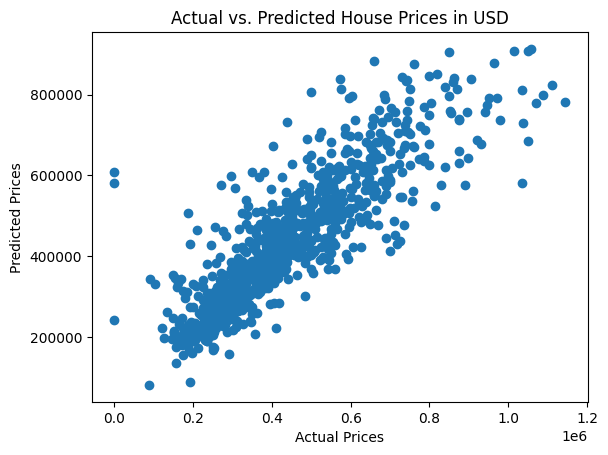

In [19]:
# Evaluate the model using mean absolute error and R-squared score
plt.scatter(val_y, val_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices in USD')

# Display the plot
plt.show()

In [23]:
# Save the trained model to a file using joblib
filename = '../models/model.pkl'
joblib.dump(model, filename)

['../models/model.pkl']